# EDA (Exploratory Data Analysis)

# # EDA Checklist

In [85]:
# 1- # observations  ( # rows , in the image data it is # image )
# 2- # Features   ( # col , in the image data it is # dimensions )
# 3- data types of features
# 4- types of problem 
# 5- Outliers
# 6- any feature that can be engineered


# feature Engineering 

In [86]:
# 1- combining 
# 2- adding 
# 3- removing 

# Important libraries

In [87]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

# EDA on Iris dataset

In [88]:
# iris dataset attribute 
# 1- sepal (length , width )
# 2- petal (length , width )
# dataset classes 
# 1- iris setosa
# 2- iris vericolor 
# 3- iris virginica

In [89]:
# here load the iris dataset 
data  = datasets.load_iris()

# print the data
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [90]:
# the dataset print  features 
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [91]:
# the dataset target names
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [92]:
# the dataset target values
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
# now we need to make a dataframe so can deal with the data
# here used numpy to get the data from the array 
data_frame = pd.DataFrame( data = np.c_[data['data'] , data['target']] ,
                          columns= data['feature_names'] + ['target'])
data_frame.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [94]:
# describe the datasets
data_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [95]:
# get info about the data

data_frame.info()
# here we see there is no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


# split the data into x and y 


In [96]:
# x contain all rows and col except the target col 
x = data_frame.iloc[: , :-1]

# y contain all rows and the target col only 
y = data_frame.iloc[: , -1]

In [97]:
# display x 
# now x contain the features 
x.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [98]:
# display y 
# now y contain the target
# here beacuse y contain 1 col so its a series
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

# split the data into train and test

In [99]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

In [100]:
# convert the splited data again into numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [101]:
# now print the siezes of arrays
# x_train.shape[0] shape[0] mean the rows number
print(f" training set size: {x_train.shape[0]} samples \n test set size: {x_test.shape[0]} samples")

 training set size: 120 samples 
 test set size: 30 samples


# normalize the dataset to get it between

In [102]:
scaler = Normalizer().fit(x_train)   #  here the scaler are fited to the training data
normalised_x_train = scaler.transform(x_train)
normalised_x_test = scaler.transform(x_test)

In [103]:
# print the trainig data before normalization and after 

# before 
print(" Before normalization \n ",x_train[0:4],"\n")

#after
print("after normalization \n",normalised_x_train[0:4])

 Before normalization 
  [[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]] 

after normalization 
 [[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]]


# visualize the data before and after normalization 

In [104]:
# here the target variable contain 0 and 1 , 2 so we need to rename it to the classes names
dic = {0.0:'setosa' , 1.0:'versicolor' , 2.0:'virginica'}
data_frame_afterRename = data_frame.replace({'target':dic})

# print the target before rename
print(data_frame['target'])

# print the target after rename
print(data_frame_afterRename['target'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object


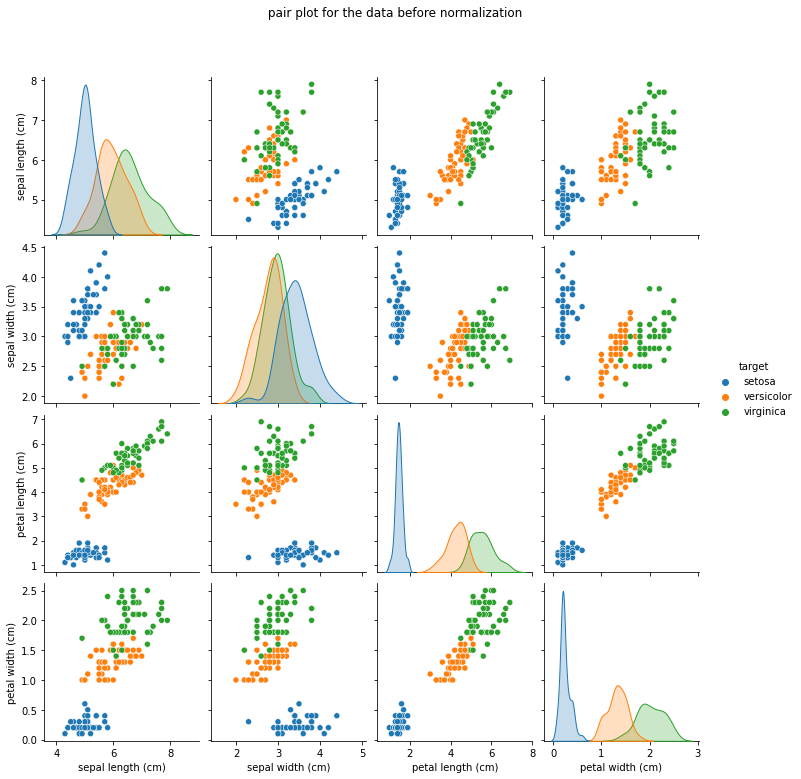

In [105]:
# pair plot for the data before normalization
# plot a pair plot between the features 
plot_before = sns.pairplot(data_frame_afterRename , hue='target')   # here the hue for colors

# give the plot a title
plot_before.fig.suptitle(" pair plot for the data before normalization  " , y=1.08) # y value the position for the title
plot_before

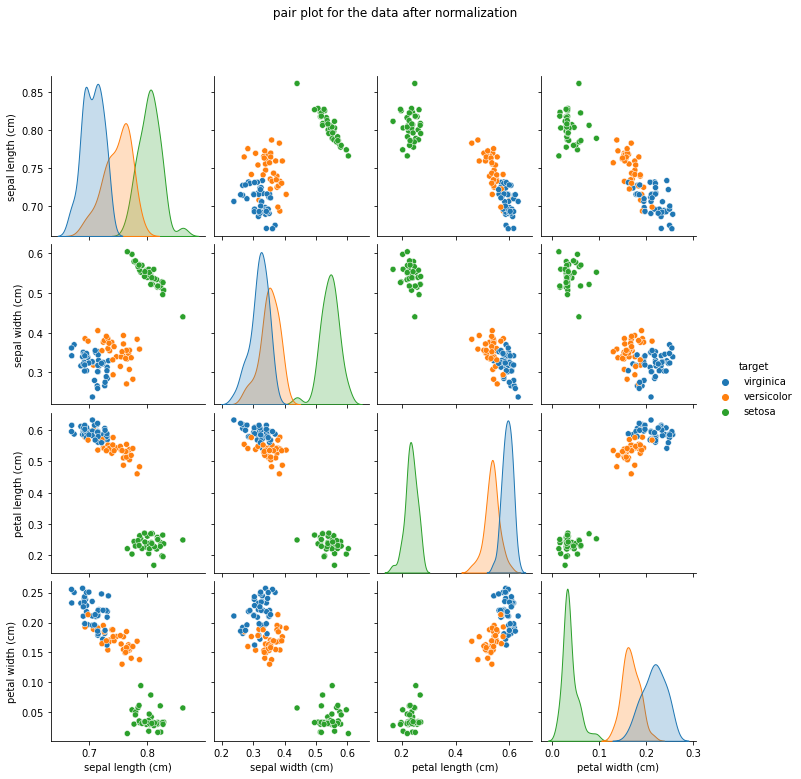

In [106]:
# pair plot for the data after normalization
# plot a pair plot between the features 

# here we need to get the data that normalised
data_frame_afterNormalization = pd.DataFrame(data= np.c_[normalised_x_train , y_train] ,
                                             columns=data['feature_names'] + ['target'])
data_frame_afterNormalization_Rename = data_frame_afterNormalization.replace({'target':dic})
plot_after = sns.pairplot(data_frame_afterNormalization_Rename , hue='target')   # here the hue for colors

# give the plot a title
plot_after.fig.suptitle(" pair plot for the data after normalization  " , y=1.08) # y value the position for the title
plot_after

# KNN algo

In [107]:
# create class for eculidean distance
def Ecu_Distance(x_train , x_test_point):
    """
        input:
            - x_train : the training data
            - x_test_point: the test point
        
        output:
            - distances : the distances between test point and each point in the training data
    """
    distances = []
    # this for loop for rows in the training data
    for row in range(len(x_train)): # loop in the rows
        curr_train_point = x_train[row]   # get point by point in each row
        curr_distance = 0 # intialize the distance to be zero
        
        # this for loop for col in the training data
        for col in range(len(curr_train_point)): # loop in the col in specific row
            curr_distance += (curr_train_point[col] - x_test_point[col])**2    # get the col distance and add them 
        curr_distance = np.sqrt(curr_distance) # get the sqaur for the distance
        distances.append(curr_distance) # store the distance in the array
    # store the distances in dataframe 
    distances = pd.DataFrame(data=distances , columns=['distance'])
    return distances    

In [108]:
# find the nearest neighbors
def nearest_neighbor(distance_point , k):
    """
        input:
            - distance_point : the distance between test point and each point in the training data
            - k : the number of neighbor you need
        output:
            - df_nearest : the nearest k neighbors between test point and the training data
            
    """
    # sort the distances using sort_values func
    df_nearest = distance_point.sort_values(by=['distance'] , axis=0)
    
    # take only the first k neighbors
    df_nearest = df_nearest[:k]
    return df_nearest

In [109]:
# classify the point 
def voting(df_nearest , y_train):
    """
        input:
            - df_nearest: the dataframe that contain the k neighbors between the test point and the training data
            - y_train: the labels of the training dataset
        output:
            - y_pred: the predication based on majority voating 
    """
    counter_vote = Counter(y_train[df_nearest.index])
    y_pred = counter_vote.most_common()[0][0]
    return y_pred

In [110]:
# KNN Algorithm at all 

def KNN_Algo(x_train , y_train , x_test , k):
    """
        input:
            - x_train: the full training dataset 
            - y_train: the lablels of training dataset
            - x_test: the full test dataset 
            - k: the number of neighbors 
        
        output:
            - y_pred: the prediction for the whole 
        
    """
    
    y_pred = []
    
     # loop for all the test dataset and perform the three steps 
    for x_test_point in x_test:
        distance_point = Ecu_Distance(x_train , x_test_point)   # step 1
        df_nearest_point = nearest_neighbor(distance_point , k) # step 2
        y_pred_point = voting(df_nearest_point , y_train)       # step 3
        y_pred.append(y_pred_point)
    
    return y_pred 
    

In [111]:
# test our algo 
k = 3
y_pred = KNN_Algo(normalised_x_train , y_train , normalised_x_test , k)
y_pred

[2.0,
 1.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 2.0,
 0.0,
 0.0,
 2.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0]

# sklearn  built in algo compare to our 

In [112]:
knn = KNeighborsClassifier(k)   # set the neighbors num 
knn.fit(normalised_x_train , y_train)  # fit the data the algo 
y_pred_sklearn = knn.predict(normalised_x_test)   #v predict the values
y_pred_sklearn




# looks same as our algo thats good

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       2., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0.])

In [113]:
# check if the two algo is same 
# check the two array is equal 
print(np.array_equal(y_pred , y_pred_sklearn))
# its true

True


In [114]:
# another method to ensure that are equal 
# use accuracy method 
print(f" the accuracy of our algo is { accuracy_score(y_test , y_pred)}")
print(f" the accuracy of sklearn  algo is { accuracy_score(y_test , y_pred_sklearn)}")

 the accuracy of our algo is 0.9666666666666667
 the accuracy of sklearn  algo is 0.9666666666666667
